<a href="https://colab.research.google.com/github/amarie-51/projekt_NLP/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = np.reshape(x_train, (60000, 28, 28, 1))
x_test = np.reshape(x_test, (10000, 28, 28, 1))
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
x_train=(x_train/255)
x_test=(x_test/255)
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
y_train=keras.utils.to_categorical(y_train, 10)
y_test=keras.utils.to_categorical(y_test, 10)

In [10]:
keras.Sequential()

In [32]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [35]:
history = model.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 118s 314ms/step - loss: 0.0379 - accuracy: 0.9877 - val_loss: 0.0396 - val_accuracy: 0.9893
Epoch 2/6
375/375 [==============================] - 118s 314ms/step - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.0356 - val_accuracy: 0.9901
Epoch 3/6
375/375 [==============================] - 118s 316ms/step - loss: 0.0317 - accuracy: 0.9904 - val_loss: 0.0388 - val_accuracy: 0.9895
Epoch 4/6
375/375 [==============================] - 118s 315ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.0380 - val_accuracy: 0.9900
Epoch 5/6
375/375 [==============================] - 118s 315ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0412 - val_accuracy: 0.9902
Epoch 6/6
375/375 [==============================] - 118s 315ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0365 - val_accuracy: 0.9912


In [24]:
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Without dropout

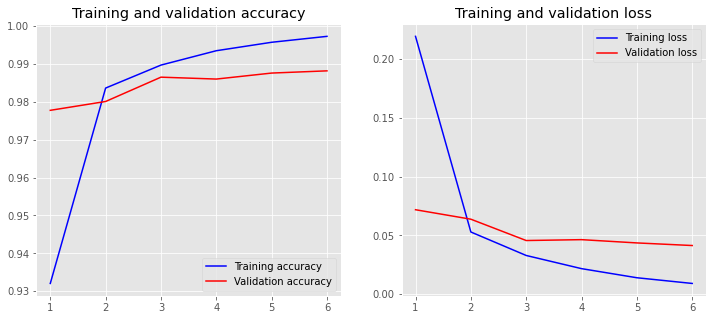

In [18]:
plot_history(history)

With dropout

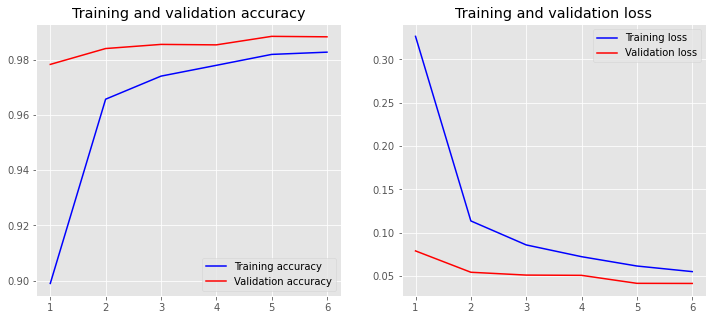

In [30]:
plot_history(history)

In [19]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy)

0.03281829506158829 0.9898999929428101


In [31]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy)

0.031378261744976044 0.9901999831199646
